In [1]:
import pandas as pd
import numpy as np
import collections
import operator
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import itertools
import os,sys
import shutil
import itertools
from mpl_toolkits.mplot3d import Axes3D
import random
from Bio import PDB
from pylab import rcParams
from collections import Counter

df= pd.read_csv('xx.csv')

#### Analyse the distribution of side chain dihedral angles: Intro
The resultant cystine residue from the formation of the covalent disulfide bond between the thiol groups of two cysteine side chains is comprised of five dihedral angles. Based on X-ray structures we look at the distribution of these angles (X1, X2 and X3) to define their different conformations.

/Users/david/coding/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/david/coding/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/david/coding/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

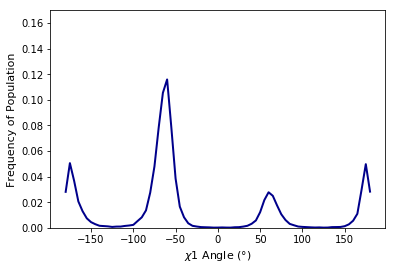

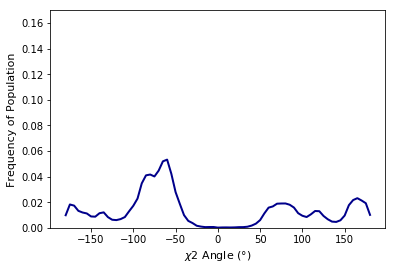

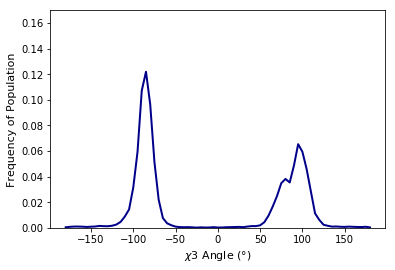

In [2]:
######################################
#--------------------------------------
# Round all five cystine X angles to nearest 5 degress
#--------------------------------------
#######################################
cystine_dihedrals = df[['Cys1_x1','Cys1_x2','x3','Cys2_x2','Cys2_x1']]


cystine_dihedrals['Cys1_x1'] = cystine_dihedrals['Cys1_x1'].map(lambda Cys1_x1: int(5 * round(float(Cys1_x1)/5)))
cystine_dihedrals['Cys2_x1'] = cystine_dihedrals['Cys2_x1'].map(lambda Cys2_x1: int(5 * round(float(Cys2_x1)/5)))
cystine_dihedrals['Cys1_x2'] = cystine_dihedrals['Cys1_x2'].map(lambda Cys1_x2: int(5 * round(float(Cys1_x2)/5)))
cystine_dihedrals['Cys2_x2'] = cystine_dihedrals['Cys2_x2'].map(lambda Cys2_x2: int(5 * round(float(Cys2_x2)/5)))
cystine_dihedrals['x3'     ] = cystine_dihedrals['x3'].map(lambda x3: int(5 * round(float(x3)/5)))

######################################
#--------------------------------------
# Looking at total X angle distribution so combine X1 / X1B and X2 / X2B
#--------------------------------------
#######################################
x1                   = cystine_dihedrals['Cys1_x1'].tolist() + cystine_dihedrals['Cys2_x1'].tolist()
x2                   = cystine_dihedrals['Cys1_x2'].tolist() + cystine_dihedrals['Cys2_x2'].tolist()
x3                   = cystine_dihedrals['x3'].tolist()

######################################
#--------------------------------------
#Use collections to counter the frequency of each angle
#--------------------------------------
#######################################
x1_frequency         = collections.Counter(x1)
x2_frequency         = collections.Counter(x2)
x3_frequency         = collections.Counter(x3)

######################################
#--------------------------------------
# Sort dictionary in orderered fashion (smallest to largest)
#--------------------------------------
#######################################
ordered_x1_frequency = sorted(x1_frequency.items(), key=operator.itemgetter(0))
ordered_x2_frequency = sorted(x2_frequency.items(), key=operator.itemgetter(0))
ordered_x3_frequency = sorted(x3_frequency.items(), key=operator.itemgetter(0))


######################################
#--------------------------------------
# Take the correponding angles for each dihedral
#--------------------------------------
#######################################
x1_axis              = [(angle[0]) for angle in ordered_x1_frequency]
x2_axis              = [(angle[0]) for angle in ordered_x2_frequency]
x3_axis              = [(angle[0]) for angle in ordered_x3_frequency]

######################################
#--------------------------------------
# Take the frequency 
#--------------------------------------
#######################################
x1_frequency         = [(float(frequency[1]) / float(len(x1))) for frequency in ordered_x1_frequency]
x2_frequency         = [(float(frequency[1]) / float(len(x2))) for frequency in ordered_x2_frequency]
x3_frequency         = [(float(frequency[1]) / float(len(x3))) for frequency in ordered_x3_frequency]

#######################################
# Create X1 graph
#######################################
plt.plot(x1_axis,x1_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(r"$\chi$1 Angle ($\degree$)", fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes = plt.gca()
############################
# Set y_lim to be consistent with other graphs
############################
axes.set_ylim([0,0.17])
plt.savefig('x1.png')
plt.show()

#############################
# Create X2 graph
#############################
plt.plot(x2_axis,x2_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(r"$\chi$2 Angle ($\degree$)", fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes = plt.gca()
axes.set_ylim([0,0.17])
plt.savefig('x2.png')
plt.show()

###############################
# Creat X3 graph
###############################
plt.plot(x3_axis,x3_frequency, color = 'darkblue',linewidth = 2)
plt.xlabel(r"$\chi$3 Angle ($\degree$)", fontsize=11)
plt.ylabel('Frequency of Population', fontsize=11)
axes = plt.gca()
axes.set_ylim([0,0.17])
plt.savefig('x3.png')
plt.show()

#### Cystine dihedral distribution: Results
In agreement with previous analysis, can see that X1 adopts the 'Gauche-, Gauche+ and Trans' conformations with a very narrow distribution. Therefore defined as:
    Gauche+ (+60) = +30 to +90
    Gauche- (-60) = -90 to -30
    Trans   (180) = 150 to 210
    
X2 also adopts these conformations, however a greater distribution is observed. Therefore the following ranges were used for classificaiton
    Gauche+ (+60) = +30 to +120
    Gauche- (-60) = -120 to -30
    Trans   (180) = 150 to 210 

X3 angle distribution follows the previously identified 'Right Handed (+90)' or 'Left Handed (-90)'
        Right Handed (+90) =   +60 to +120
        Left Handed  (-90) =  -120 to -60


#### Frequency of Configurations: Intro
Based on the definitions above, there is a possible 90 configurations a cystine can adopt when considering all five X angles (X1, X2, X3, X2, X1).
Below calculates the frequency of those configurations
If a disulfide had a dihedral angle ouf of the defined ranges above it was excluded from analysis

In [3]:

######################################
#--------------------------------------
# Generate a list of all possible configurations based on cystine dihedral angles
# X1 and X2 angles can be Gauche+, Gauche- or Trans
# X3 angles can be +90 or -90
# Over 90 theoretical configurations
# Store in a list as 'configurations'
#--------------------------------------
#######################################

a = 60
b = -60
c = 180
d = -90
e = 90

import string
exclude        = set(string.punctuation)
dihedralsx     = np.empty(shape=(5,1))
possible       = [[a,b,c],[a,b,c],[d,e],[a,b,c],[a,b,c]]
configurations = list(itertools.product(*possible))
unique         = []
for value in configurations:
      if value[::-1] in unique:
            continue
      unique.append(value)
configurations = unique

######################################
#--------------------------------------
# Round all of the dihedral X angles to suitable conformation
# X1 angles are +/- 30 degrees of ,+60,-60 or 180
#                          +60 = +30 to +90
#                          -60 = -90 to -30 
#                          180 = 150 to 210
#
# X2 angles show more distribution (refer to previous figure) Therefore are:
#                          +60 = +30 to + 130
#                          -60 = -130 to -30
#                          180 =  150 to 210
#
# X3 angles are either +90 (Right Handed) or -90 (Left Handed)
#                          +90 = +60 to 120
#                          -90 = -120 to -60
#--------------------------------------
#######################################




######################################
#--------------------------------------
# Define the rounding functions and apply to angles
#--------------------------------------
#######################################
def x1_rounded(x1):
    x1 = float(x1)
    if (x1 <=  90) & (x1 >= 30):
        x1= 60
    if (x1 >= -90)  & (x1 <= -30):
        x1 = -60   
    if (x1 <=  180) & (x1 >= 150):
        x1= 180
    if (x1 >= -180) & (x1 <= -150):
        x1=180
    return(x1)

def x2_rounded(x2):
    x2 = float(x2)
    if (x2 <=  130) & (x2 >= 30):
        x2= 60
    if (x2 >= -130) & (x2 <= -30):
        x2 = -60   
    if (x2 <=  180) & (x2 >= 150):
        x2= 180
    if (x2 >= -180) & (x2 <= -150):
        x2=180
    return(x2)

def x3_rounded(x3):
    x3 = float(x3)
    if (x3  <=  130)  & (x3 >= 60):
        x3   = 90
    if (x3  >=  -130) & (x3 <= -60):
        x3   = -90
    return(x3)
        
df['Cys1_x1']  = df['Cys1_x1'].apply(x1_rounded)
df['Cys2_x1']  = df['Cys2_x1'].apply(x1_rounded)
df['Cys1_x2']  = df['Cys1_x2'].apply(x2_rounded)
df['Cys2_x2']  = df['Cys2_x2'].apply(x2_rounded)
df['x3'     ]  = df['x3'     ].apply(x3_rounded)

######################################
#--------------------------------------
# Count the number of each configuration
# Have to consider assymetical configuraitons (x1,x2,x3,x2',x1' ==  x1',x2',x3,x2,1)
#--------------------------------------
#######################################

def configuration_count(config,df):
    config         = list(config)
    forward_config = len(df.loc[(df['Cys1_x1'] == float(config[0])) & (df['Cys1_x2'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['Cys2_x2'] == float(config[3]))& (df['Cys2_x1'] == float(config[4])) ])

    ######################################
    #--------------------------------------
    # If configuration IS NOT symmetrical, have to consider the reverse order (Cys2 - Cys1)
    #--------------------------------------
    #######################################
    if config != config[::-1]:
        reverse_config =  len(df.loc[(df['Cys2_x1'] == float(config[0])) & (df['Cys2_x2'] == float(config[1]))  & (df['x3'] == float(config[2])) & (df['Cys1_x2'] == float(config[3]))& (df['Cys1_x1'] == float(config[4])) ])
        forward_config = reverse_config + forward_config
    return(forward_config)



######################################
#--------------------------------------
# Separate configurations based on the x3 angle (either +90 or -90)
# Store in dictionary
#--------------------------------------
#######################################
plus_x3_configuration_dict  = {}
minus_x3_configuration_dict = {}
for config in configurations:
    if list(config)[2] == 90:
        plus_x3_configuration_dict[config] = configuration_count(config,df)
    if list(config)[2] == -90:
        minus_x3_configuration_dict[config] = configuration_count(config,df)

                
plus_x3_ordered_configuration  = sorted(plus_x3_configuration_dict.items(),  key=operator.itemgetter(0))
minus_x3_ordered_configuration = sorted(minus_x3_configuration_dict.items(), key=operator.itemgetter(0))



total_lefthanded = sum((item) for item in minus_x3_configuration_dict.values())
total_righhanded = sum((item) for item in plus_x3_configuration_dict.values())
total_disulfides = total_lefthanded + total_righhanded
print 'Total Number of Disulfides:',len(df)
print 'Total Number of Disulfides in Defined Configurations for Structural Analysis:',total_disulfides


######################################
#--------------------------------------
# Repeat the same process, but create a peptide and protein dictionary
#--------------------------------------
#######################################
peptide_df = df.loc[(df['seqlength'] <= 200) & (df['chain1'] == df['chain2'])]

peptide_plus_x3_configuration_dict  = {}
peptide_minus_x3_configuration_dict = {}
for config in configurations:
    if list(config)[2] == 90:
        peptide_plus_x3_configuration_dict[config] = configuration_count(config,peptide_df)
    if list(config)[2] == -90:
        peptide_minus_x3_configuration_dict[config] = configuration_count(config,peptide_df)

                
peptide_plus_x3_ordered_configuration  = sorted(peptide_plus_x3_configuration_dict.items(),  key=operator.itemgetter(0))
peptide_minus_x3_ordered_configuration = sorted(peptide_minus_x3_configuration_dict.items(), key=operator.itemgetter(0))

######################################
#--------------------------------------
# Repeat the same process, but create a protein dictionary
#--------------------------------------
#######################################
protein_df = df.loc[(df['seqlength'] > 200) | (df['chain1'] != df['chain2'])]
protein_plus_x3_configuration_dict  = {}
protein_minus_x3_configuration_dict = {}
for config in configurations:
    if list(config)[2] == 90:
        protein_plus_x3_configuration_dict[config] = configuration_count(config,protein_df)
    if list(config)[2] == -90:
        protein_minus_x3_configuration_dict[config] = configuration_count(config,protein_df)

                
protein_plus_x3_ordered_configuration  = sorted(protein_plus_x3_configuration_dict.items(),  key=operator.itemgetter(0))
protein_minus_x3_ordered_configuration = sorted(protein_minus_x3_configuration_dict.items(), key=operator.itemgetter(0))


######################################
#--------------------------------------
# Repeat the same process, but create a vicinal dictionary
#--------------------------------------
#######################################
vicinal_plus_x3_configuration_dict  = {}
vicinal_minus_x3_configuration_dict = {}

vicinal_df = df.loc[df['chain1'] == df['chain2']]
vicinal_df['seq_dif'] = vicinal_df['Cys_1'] - vicinal_df['Cys_2']
vicinal_df = vicinal_df.loc[vicinal_df['seq_dif'] == 1]

for config in configurations:
    if list(config)[2] == 90:
        vicinal_plus_x3_configuration_dict[config] = configuration_count(config,vicinal_df)
    if list(config)[2] == -90:
        vicinal_minus_x3_configuration_dict[config] = configuration_count(config,vicinal_df)
vicinal_plus_x3_ordered_configuration  = sorted(vicinal_plus_x3_configuration_dict.items(),  key=operator.itemgetter(0))
vicinal_minus_x3_ordered_configuration = sorted(vicinal_minus_x3_configuration_dict.items(), key=operator.itemgetter(0))
      

Total Number of Disulfides: 19605
Total Number of Disulfides in Defined Configurations for Structural Analysis: 15538


/Users/david/coding/lib/python2.7/site-packages/ipykernel_launcher.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Generate Configuration Frequency Graphs
Generate a 3D plot tha shows the frequency of population for each configuration

In [4]:
def generate_configuration_plots(minus_x3_dict,plus_x3_dict):
	xpos = []
	ypos = []
	
	i = 0
	while i < 9:
	    xpos = xpos + [i for _ in range(i,9)]
	    ypos = ypos + [_ for _ in range(i,9)]
	    i    = i +1
	zpos = [0 for _ in range(len(minus_x3_dict))]
	
	
	num_elements = len(xpos)
	dx           = np.ones(45)
	dy           = np.ones(45)
	dx           = [0.8 for _ in range(len(minus_x3_dict))]
	dy           = [0.8 for _ in range(len(minus_x3_dict))]
	minus_dz     = [_[1] for _ in minus_x3_dict]
	plus_dz      = [_[1] for _ in plus_x3_dict]
	
	
	total_disulfides = np.sum(minus_dz) + np.sum(plus_dz)
	######################################
	#--------------------------------------
	# Convert dz from total number to frequency, by dividing by total number of disulfides 
	# in defined configurations. Then set the axis limits based on the maximum frequency observed
	# (know it will be in the minus_90 configurations)
	#--------------------------------------
	#######################################
	minus_dz = [float(_)/float(total_disulfides) for _ in minus_dz]
	plus_dz  = [float(_)/float(total_disulfides) for _ in plus_dz]
	maximum_frequency = max(minus_dz)
	
	
	
	
	######################################
	#--------------------------------------
	# Define x-tick and y-tick labels
	#--------------------------------------
	#######################################
	xy_tick_labels = ["-60,-60","-60,60","-60,180","60,-60","60,60",'60,180','180,-60,',"180,60",'180,180']
	
	fig = plt.figure()
	ax1  = Axes3D(fig)
	ax1.set_title(r"$\chi$3 = -90$\degree$", loc = 'center')
	ax1.set_zlabel("Frequency",fontsize = 13)
	plt.xticks(np.arange(min(xpos), max(xpos)+1, 1.0),xy_tick_labels,rotation=45)
	plt.yticks(np.arange(min(ypos)+0.5, max(ypos)+1, 1.0),xy_tick_labels,rotation=-75)
	ax1.set_xlabel(r"Cys1 ($\chi$1,$\chi$2)($\degree$)",fontsize = 10, labelpad =25)
	ax1.set_ylabel(r"Cys2 ($\chi$1,$\chi$2)($\degree$)",fontsize = 10, labelpad =25)
	ax1.bar3d(xpos, ypos, zpos, dx, dy, minus_dz, color="blue")
	ax1.set_zlim([0,0.3 + 0.05])
	
	
	fig2 = plt.figure()
	ax2  = Axes3D(fig2)
	ax2.set_zlim([0,0.3 + 0.05])
	ax2.set_title(r"$\chi$3 = +90$\degree$", loc = 'center')
	ax2.set_zlabel("Frequency",fontsize = 13)
	ax2.set_xlabel(r"Cys1 ($\chi$1,$\chi$2)($\degree$)",fontsize = 10, labelpad =25)
	ax2.set_ylabel(r"Cys2 ($\chi$1,$\chi$2)($\degree$)",fontsize = 10, labelpad =25)
	ax2.bar3d(xpos, ypos, zpos, dx, dy, plus_dz, color="blue")
	plt.xticks(np.arange(min(xpos), max(xpos)+1, 1.0),xy_tick_labels,rotation=45)
	plt.yticks(np.arange(min(ypos)+0.5, max(ypos)+1, 1.0),xy_tick_labels,rotation=-75)
	return()

# Generate configuration graphs for all cystines

()

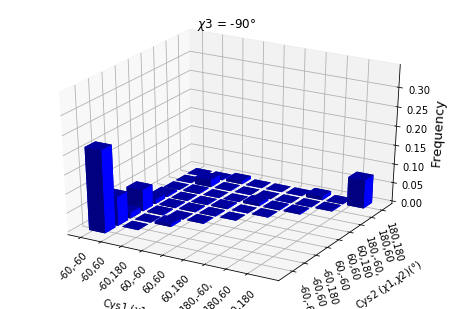

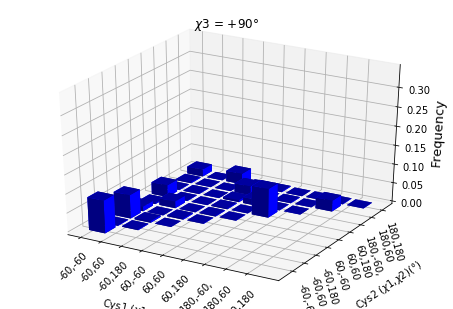

In [5]:
generate_configuration_plots(minus_x3_ordered_configuration,plus_x3_ordered_configuration)

## Generate configuration graphs for peptide cystines

()

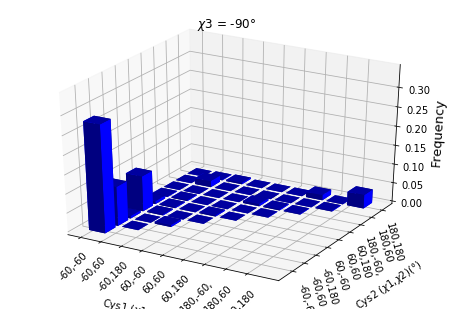

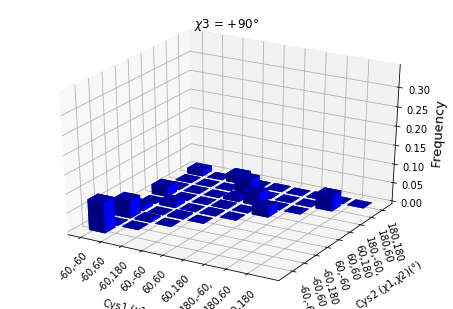

In [6]:
generate_configuration_plots(peptide_minus_x3_ordered_configuration,peptide_plus_x3_ordered_configuration)

## Generate configuration graphs for protein cystines

()

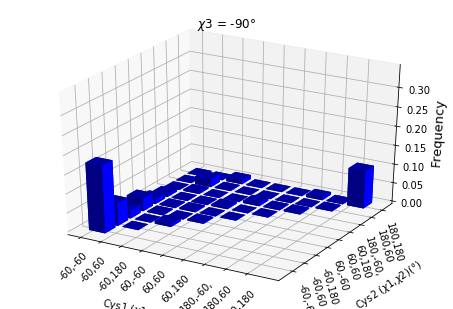

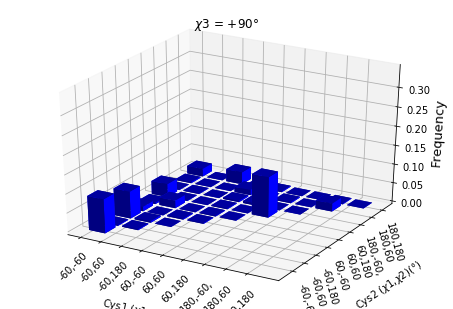

In [7]:
generate_configuration_plots(protein_minus_x3_ordered_configuration,protein_plus_x3_ordered_configuration)

## For Vicinal Disulfides

()

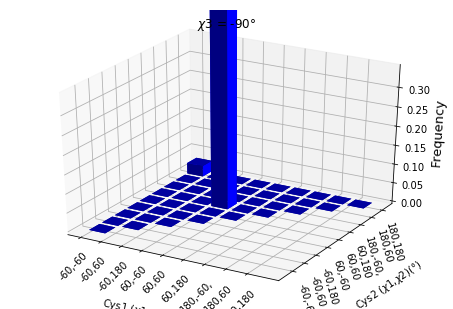

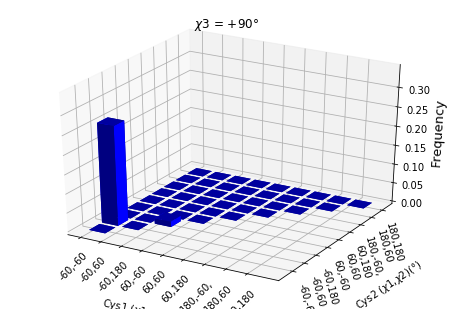

In [8]:
generate_configuration_plots(vicinal_minus_x3_ordered_configuration,vicinal_plus_x3_ordered_configuration)

## CONFIGURATION FUNCTION
### The below funciton returns individual dataframes for each configuration
### It will be called to generate figures that investigate structural features based on configuration
### It re-writes the dataframe to ensure Cys1 - Cys2 == Cys2 - Cys1 based on configuration order


In [9]:
###########################################################################################
# The re_write columns is for the 'reverse configuraiton' dataframes
# where the config = x1b,x2b,x3,x2,x1
# By reversing the column names can easily then append to the forward dataframe for analysis
############################################################################################
def rewrite_columns(dataframe):
    dataframe.columns = dataframe.columns.str.replace("Cys2", "Cys3")
    dataframe.columns = dataframe.columns.str.replace("Cys1", "Cys2")
    dataframe.columns = dataframe.columns.str.replace("Cys3", "Cys1")
    return (dataframe)

###################################################################
# Function to return the pandas dataframe for the desired configuration
####################################################################

configuration_dataframe_dict = {}
def configuration_dataframe_return(config):
    config = list(config)
    forward_config = pd.DataFrame(columns = list(df))
    reverse_config = pd.DataFrame(columns = list(df))
    ##############################################################################################################
    # Forward Configuration:
    # Dihedrals are labelled as X1,X2,X3,X2b,X1b:
    # The forward configuration is when this order matches the configuration
    # For example: Config == -180,-60,-90,-60,-60: 
    # Search the database and get any cystine residues where we observe that configuration
    # However the reverse of the CONFIG: -60,-60,-90,-60,-180 is also the same:
    # Therefore have to search where X1b, X2B, X3, X2, X1 == Config
    #
    # IF THE CONFIGURATION IS IDENTICAL: -60,-60,-90,-60,-60 we do not search for the reverse configuration as then
    # the dataframe would be doubled
    ###############################################################################################################
    forward_config = (df.loc[
                        (df['Cys1_x1'] == float(config[0])) & 
                        (df['Cys1_x2'] == float(config[1])) & 
                        (df['x3'     ] == float(config[2])) & 
                        (df['Cys2_x2'] == float(config[3])) & 
                        (df['Cys2_x1'] == float(config[4])) 
                       ])
    
    ###################################################################################
    # If the configuration IS NOT symmetrical, then search for the reverse configuration
    # x1b,x2b,x3,x2,x1
    ###################################################################################
    if config != config[::-1]:
        reverse_config = (df.loc[
                             (df['Cys2_x1'] == float(config[0])) & 
                             (df['Cys2_x2'] == float(config[1])) & 
                             (df['x3'     ] == float(config[2])) & 
                             (df['Cys1_x2'] == float(config[3])) & 
                             (df['Cys1_x1'] == float(config[4])) 
                            ])
        ###############################################################################################
        # Apply the rewrite_columns function so Cys1 and Cys2 properties match with that of forward_config
        ################################################################################################
        reverse_config = rewrite_columns(reverse_config)

        #################################################################################
        # Append the two dataframes together
        #################################################################################
        forward_config = pd.concat([forward_config, reverse_config])
    
    return(forward_config)

for config in configurations:
    configuration_dataframe_dict[config] = configuration_dataframe_return(config)

## Function to generate Ramachandran Plots

In [10]:

###########################################################################
# Below function will create Ramachandran plots to show distribution of backbone angles
# The code is adapted from Peter Cock - https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/ramachandran/
###########################################################################
rama_preferences = {
            "General": {
            "file": "./rama_data/pref_general.data",
            "cmap": mpl.colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        },
           "Second": {
            "file": "./rama_data/pref_general.data",
            "cmap": mpl.colors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF']),
            "bounds": [0, 0.0005, 0.02, 1],
        }
    }
rama_pref_values = {}
for key, val in rama_preferences.items():
        rama_pref_values[key] = np.full((360, 360), 0, dtype=np.float64)
        with open(val["file"]) as fn:
            for line in fn:
                if not line.startswith("#"):
                    # Preference file has values for every second position only
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 179][int(float(line.split()[0])) + 180] = float(
                        line.split()[2])
                    rama_pref_values[key][int(float(line.split()[1])) + 180][int(float(line.split()[0])) + 179] = float(
                        line.split()[2])
normals = {}
outliers = {}
for key, val in rama_preferences.items():
        normals[key]  = {"x": [], "y": []}
        outliers[key] = {"x": [], "y": []}   
        
def ramachandran(cys1_phi,cys1_psi,cys2_phi,cys2_psi,config):

    for idx, (key, val) in enumerate(sorted(rama_preferences.items(), key=lambda x: x[0].lower())):
        plt.subplot(1, 2, idx + 1)
        plt.imshow(rama_pref_values[key], cmap=rama_preferences[key]["cmap"],
                   norm=mpl.colors.BoundaryNorm(rama_preferences[key]["bounds"], rama_preferences[key]["cmap"].N),
                   extent=(-180, 180, 180, -180))
        if idx == 0:
            plt.scatter(cys1_phi, cys1_psi,s = 6)
        if idx ==1:
            plt.scatter(cys2_phi, cys2_psi,s = 6, color = 'red')
        
        plt.xlim([-180, 180])
        plt.ylim([-180, 180])
        plt.plot([-180, 180], [0, 0], color="black")
        plt.plot([0, 0], [-180, 180], color="black")
        plt.locator_params(axis='x', nbins=7)
        plt.xlabel(r'$\phi$')
        plt.ylabel(r'$\psi$')
        plt.grid()
        plt.title(config,size=10)
        
        plt.tight_layout()
    #plt.savefig(str(config)+'rama.png')
    plt.show()
    

## Call each configuration and 

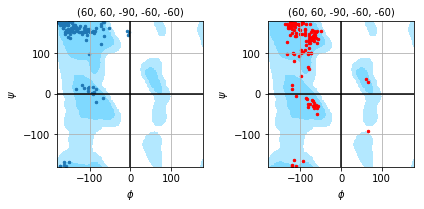

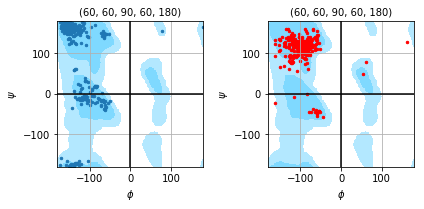

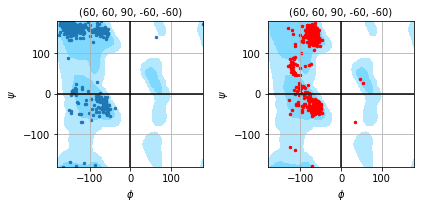

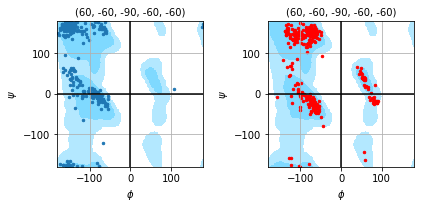

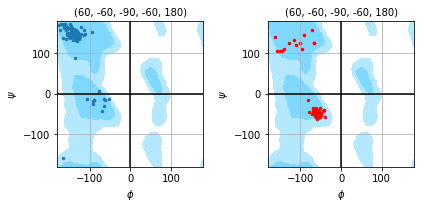

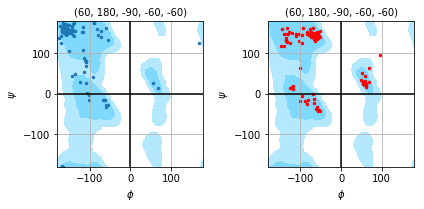

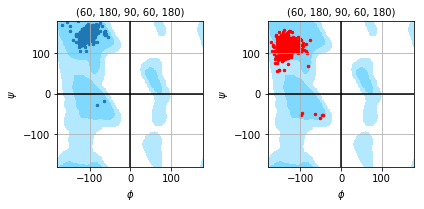

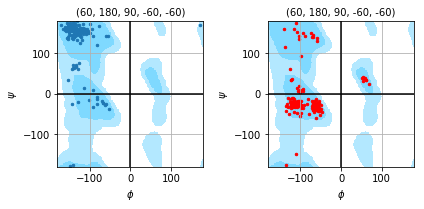

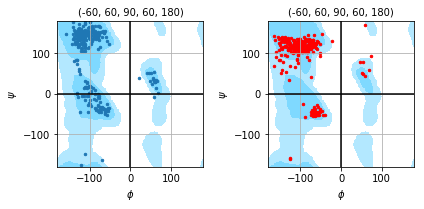

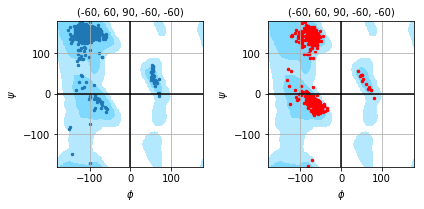

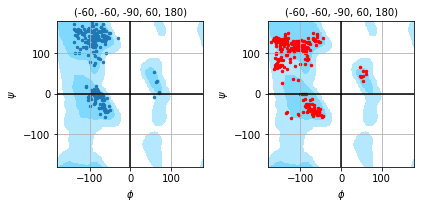

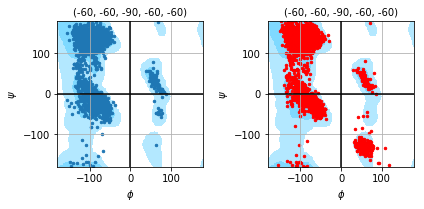

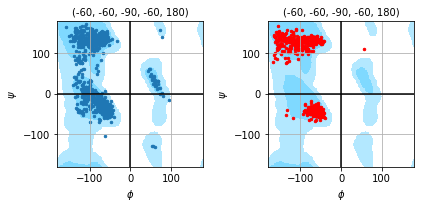

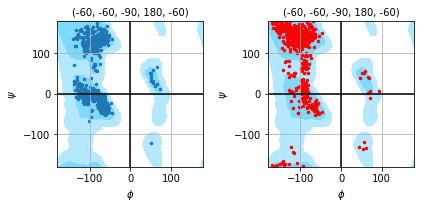

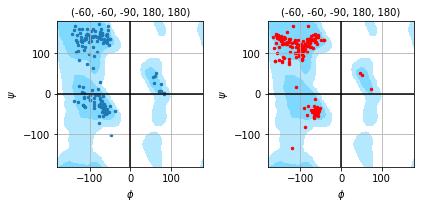

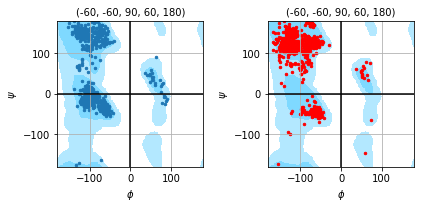

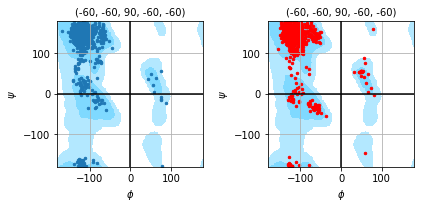

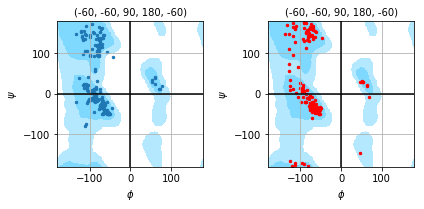

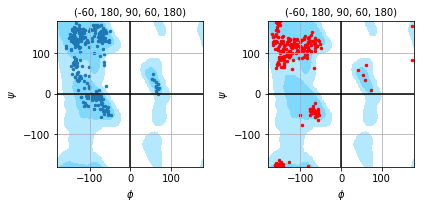

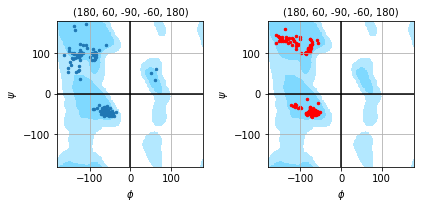

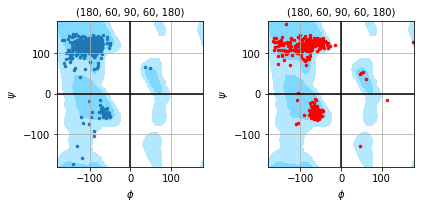

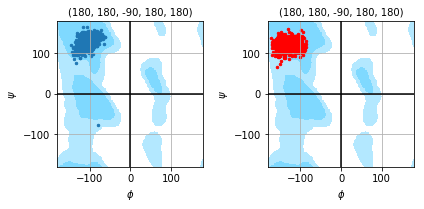

In [11]:
##########################################################################################
# Based on the configuration_dataframe function, generate a psi and phi list
# Only interested in configurations with over 100 samples
######################################################################################
for config in configurations:
    config_dataframe = configuration_dataframe_dict[config]
    cys1_phi_list    = config_dataframe['Cys1 phi'].tolist() 
    cys1_psi_list    = config_dataframe['Cys1 psi'].tolist() 
    cys2_phi_list    = config_dataframe['Cys2 phi'].tolist()
    cys2_psi_list    = config_dataframe['Cys2 psi'].tolist()
    
    if len(config_dataframe)> 100:
        ramachandran(cys1_phi_list,
                     cys1_psi_list,
                     cys2_phi_list,
                     cys2_psi_list,
                    config)

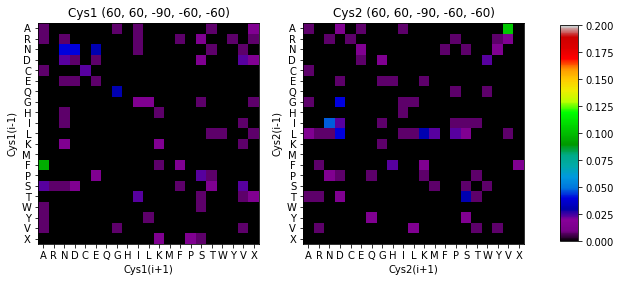

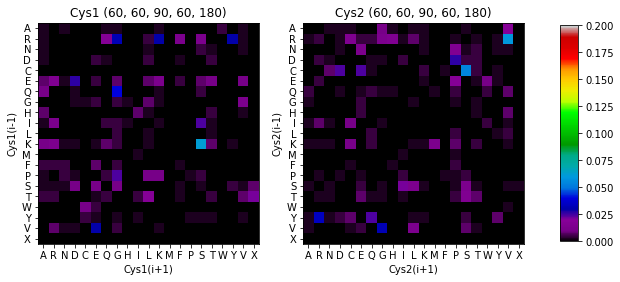

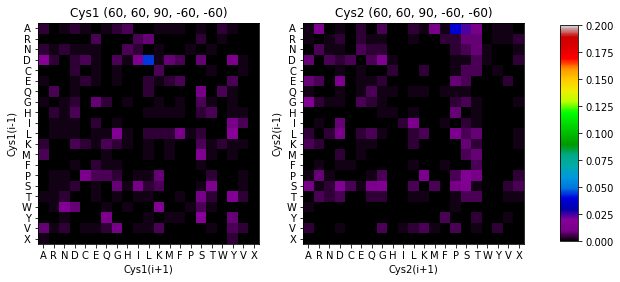

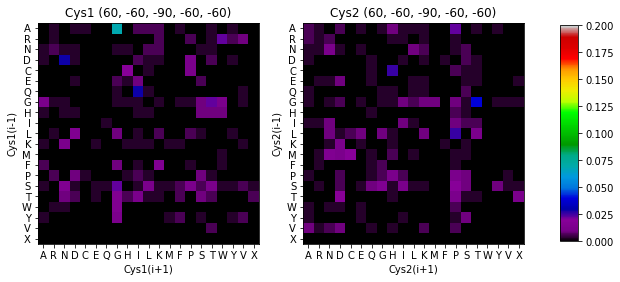

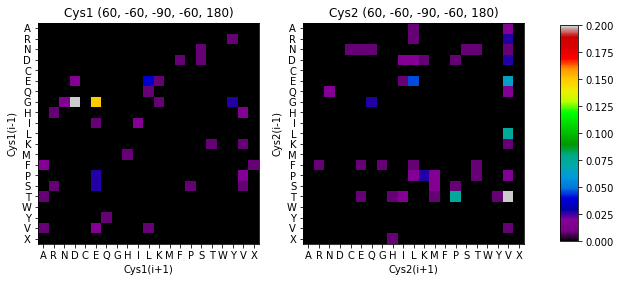

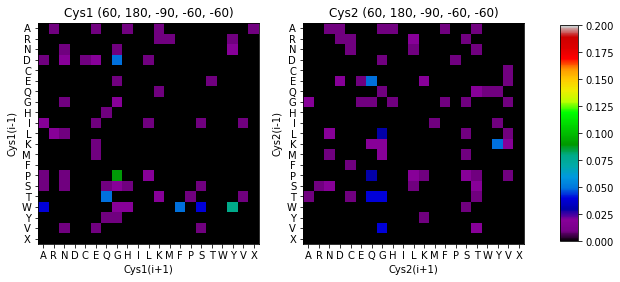

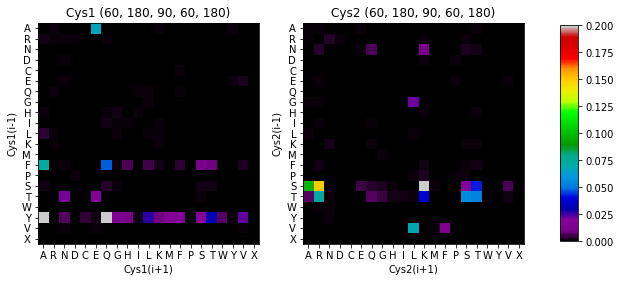

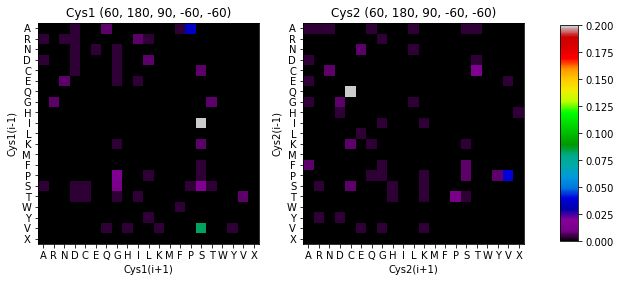

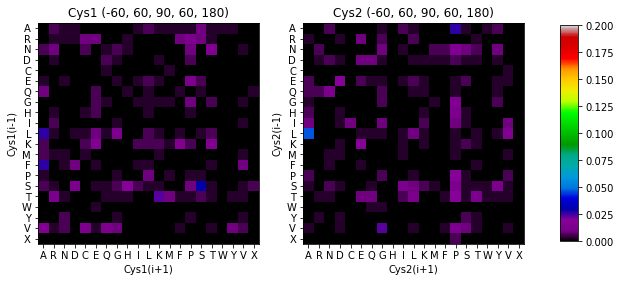

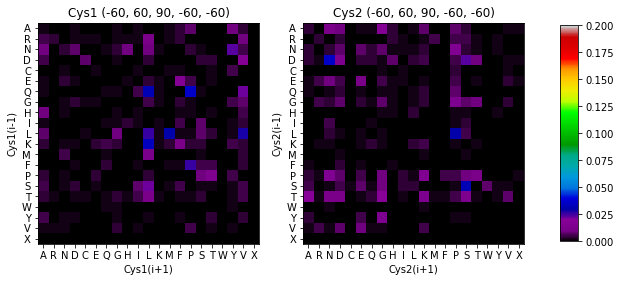

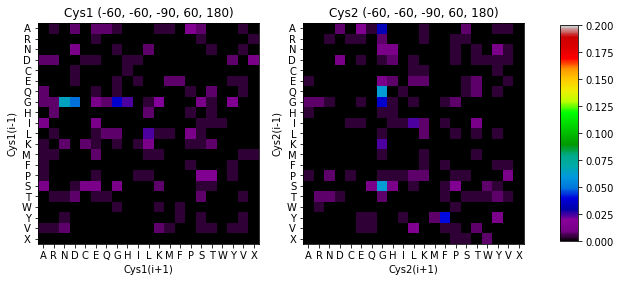

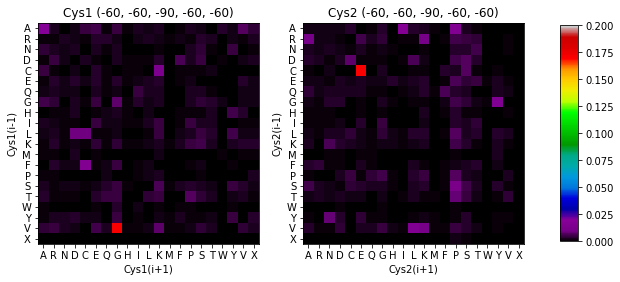

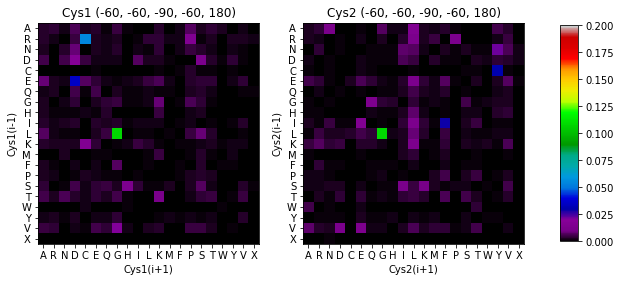

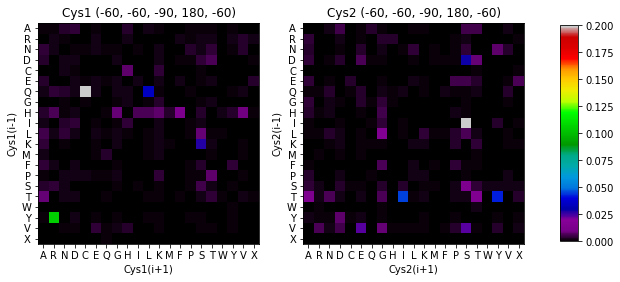

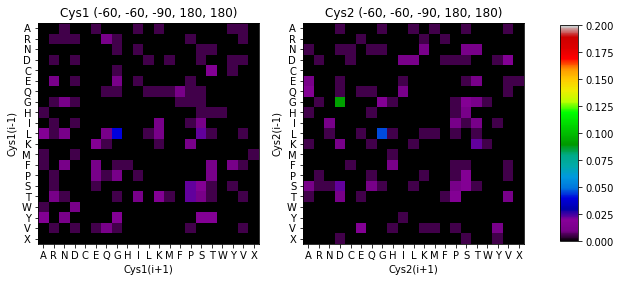

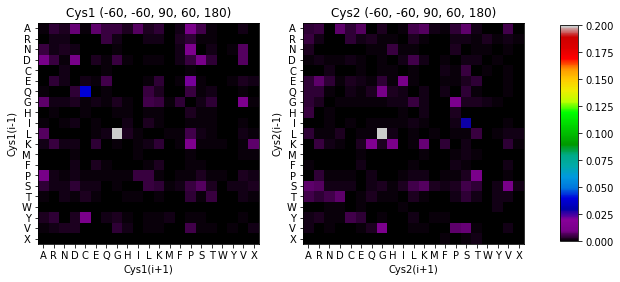

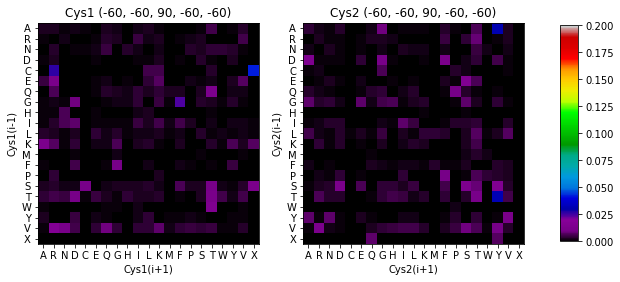

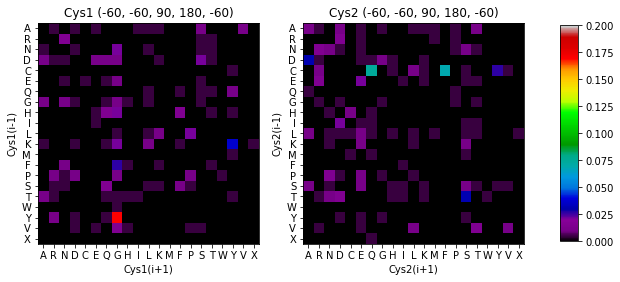

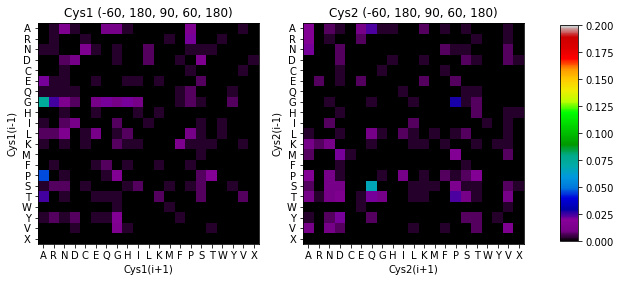

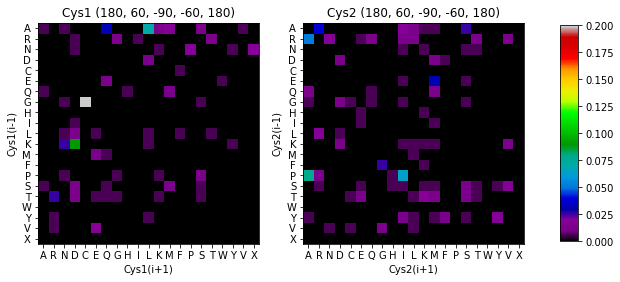

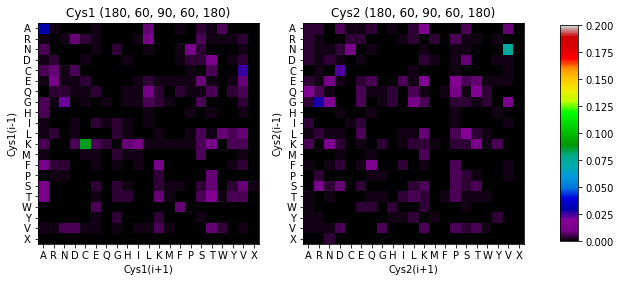

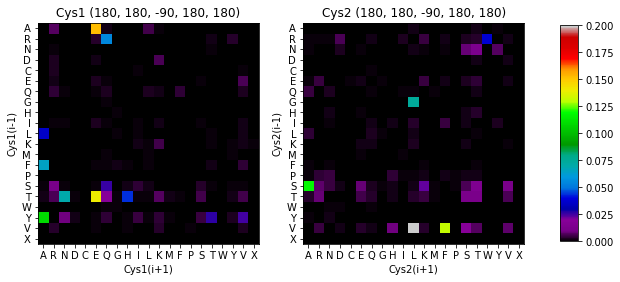

In [12]:
aminos     = ['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V','X']
amino_dict = {}
plt.rcParams['figure.figsize'] = [10, 5]
######################################
#--------------------------------------
# Assigning amino acid a number (1 to 21)
#--------------------------------------
#######################################
"""Assigning amino acid a number (1 to 20)"""
for k,value in enumerate(aminos):
    amino_dict[value]=k

######################################
#--------------------------------------
# Funciton to generate heatmpaps
#--------------------------------------
#######################################
aminos     = ['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V','X']
amino_dict = {}

######################################
#--------------------------------------
# Assigning amino acid a number (1 to 21)
#--------------------------------------
#######################################
for k,value in enumerate(aminos):
    amino_dict[value]=k

######################################
#--------------------------------------
# Funciton to generate heatmpaps
#--------------------------------------
#######################################
def amino_heatmaps(amino_array,amino_array_cys2,config):        
        amino_array=amino_array/np.sum(amino_array)
        amino_array_cys2=amino_array_cys2/np.sum(amino_array_cys2)
        

        fig = plt.subplot(121)
        for axis in [fig.xaxis, fig.yaxis]:
            axis.set(ticks=np.arange(0, len(aminos)), ticklabels=aminos)
        
        plt.imshow(amino_array, cmap=plt.cm.nipy_spectral, clim =(0,0.2))
        plt.ylabel("Cys1(i-1)")
        plt.xlabel("Cys1(i+1)")
        plt.title("Cys1 "+str(config))


        fig = plt.subplot(122)
  
  
        for axis in [fig.xaxis, fig.yaxis]:
            axis.set(ticks=np.arange(0, len(aminos)), ticklabels=aminos)

        plt.imshow(amino_array_cys2, cmap=plt.cm.nipy_spectral,clim =(0,0.2))
        plt.ylabel("Cys2(i-1)")
        plt.xlabel("Cys2(i+1)")
        plt.title("Cys2 "+str(config))

        plt.subplots_adjust(bottom=0.1, right=0.8, top=1)
        cax = plt.axes([0.85, 0.25, 0.025, 0.6])
        
        cbar = plt.colorbar(cax=cax)
        plt.show()
        return()

def search_config(config):   
    config_dataframe = configuration_dataframe_return(config)
    if len(config_dataframe)> 100 :
        amino_array = np.zeros(shape=(21,21))
        amino_array_cys2 = np.zeros(shape=(21,21))
        for index,row in config_dataframe.iterrows():
            cys1_b = row['Cys1 b res']
            cys1_a = row['Cys1 a res']
            cys2_b = row['Cys2 b res']
            cys2_a = row['Cys2 a res']
            amino_array[amino_dict[cys1_b],amino_dict[cys1_a]] = amino_array[amino_dict[cys1_b],amino_dict[cys1_a]]+1
            amino_array_cys2[amino_dict[cys2_b],amino_dict[cys2_a]] = amino_array_cys2[amino_dict[cys2_b],amino_dict[cys2_a]]+1
        amino_heatmaps(amino_array,amino_array_cys2,config)
    return()

for config in configurations:
    search_config(config)  

### Frequency of Amino Acid by Biochemical Property

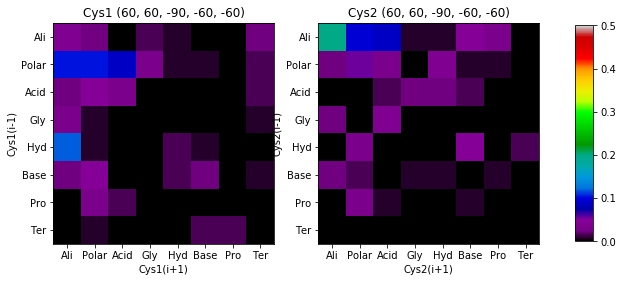

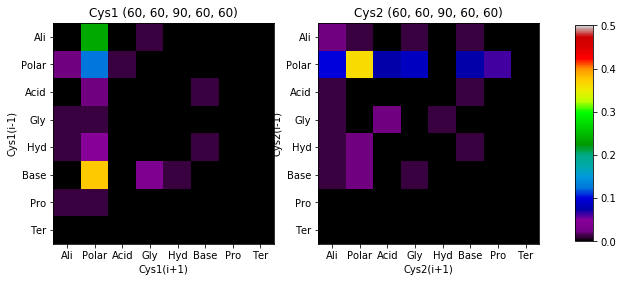

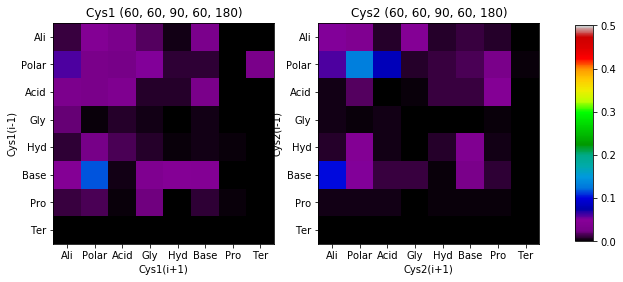

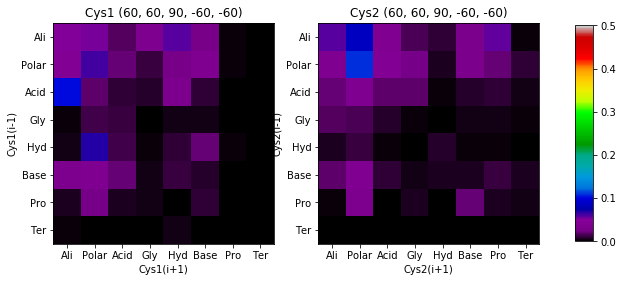

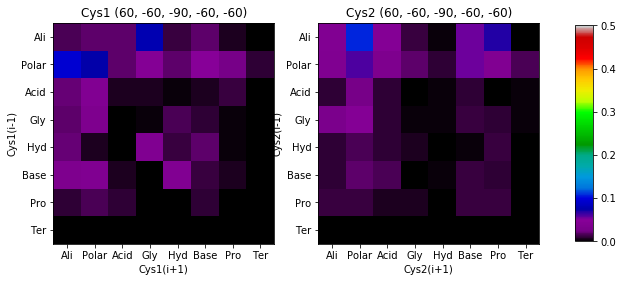

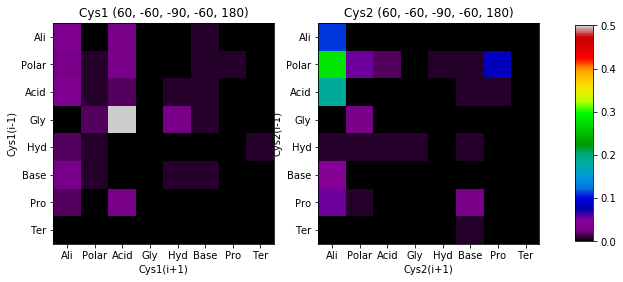

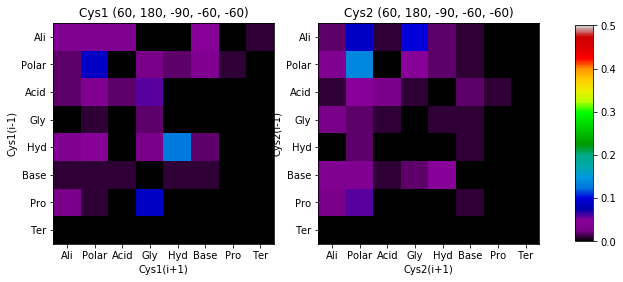

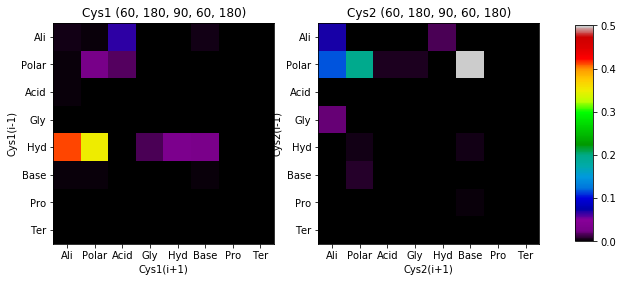

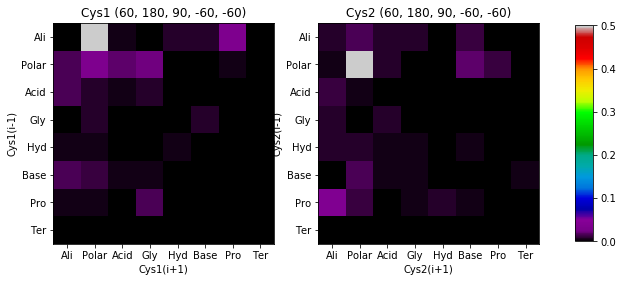

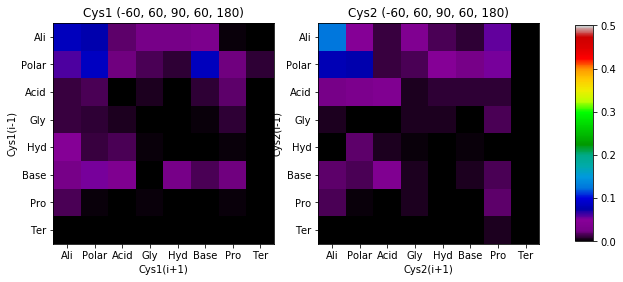

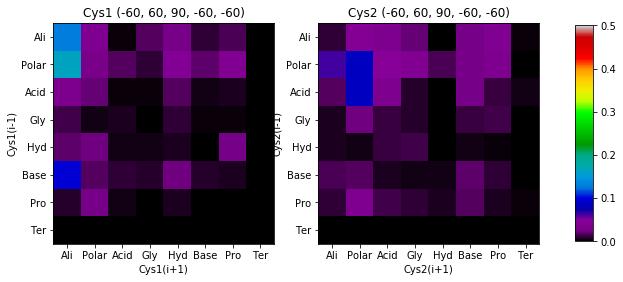

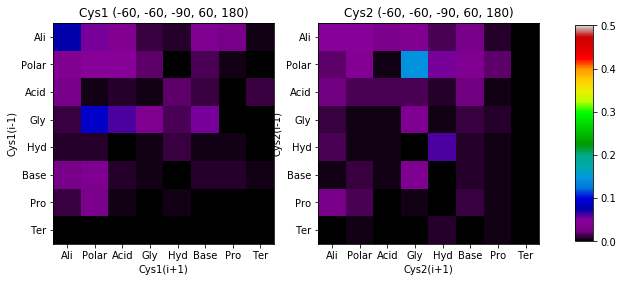

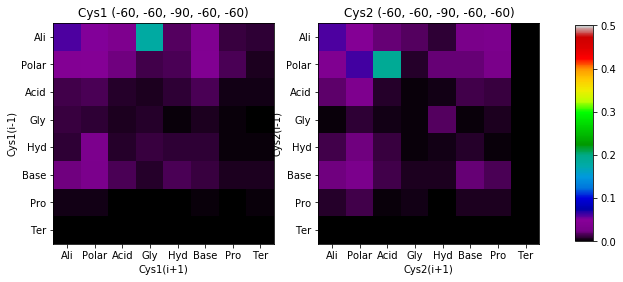

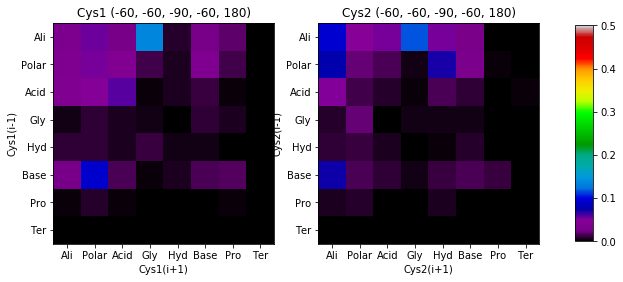

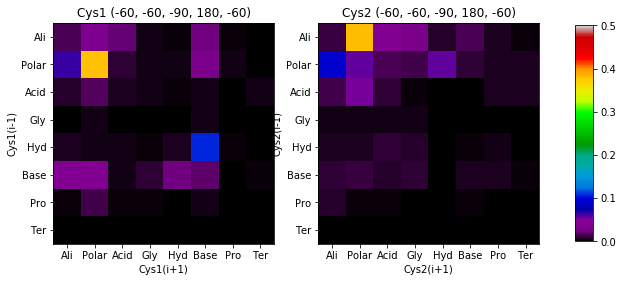

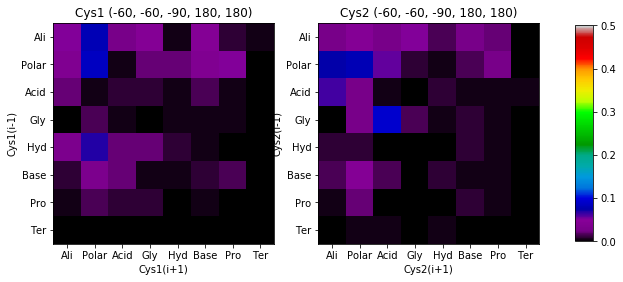

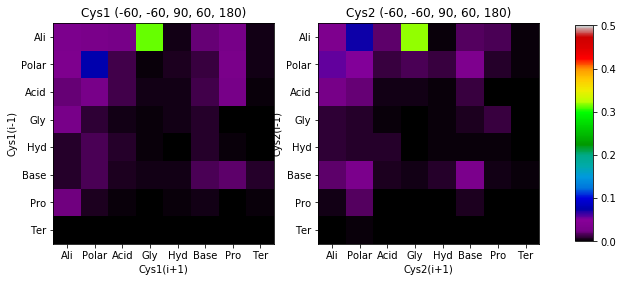

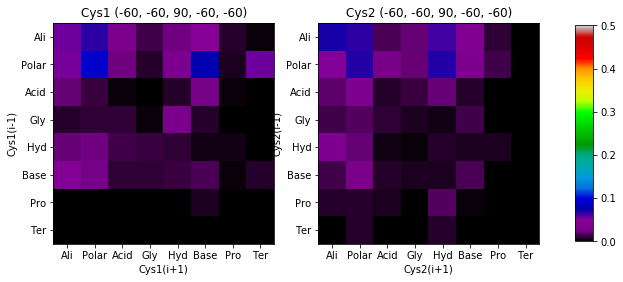

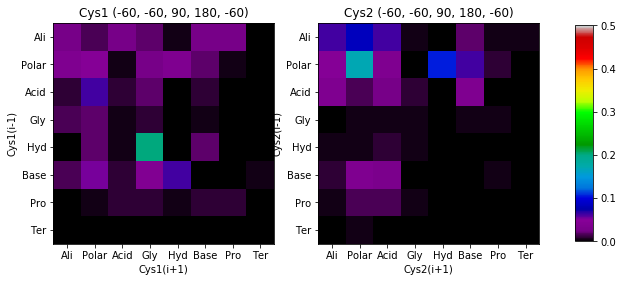

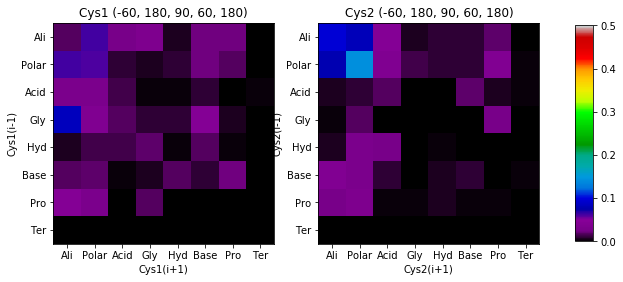

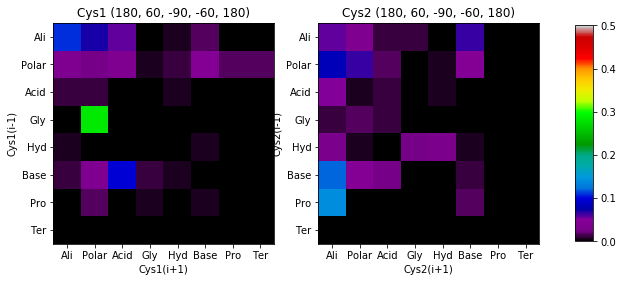

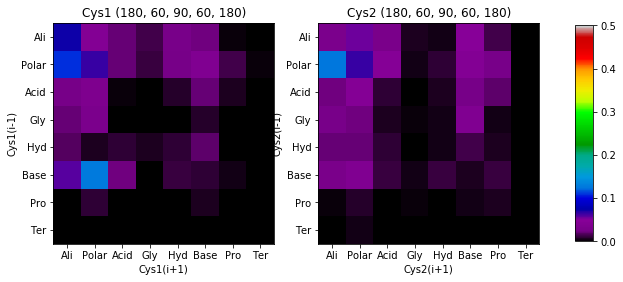

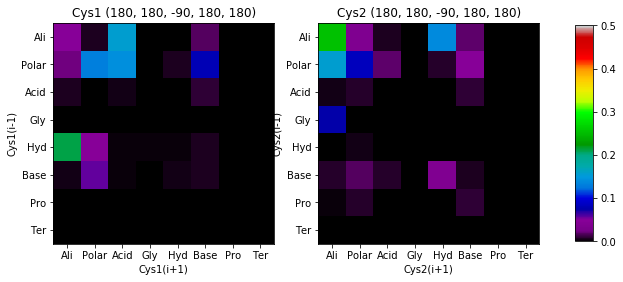

In [13]:
########################################################
# Frequency of Amino Acids By Biochemical Property
###########################################################
aminos=['A','R','N','D','c','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V','X']
aa_group_dict = {}

aa_group_dict = (dict.fromkeys(['D', 'E'], 'Acid'))
aa_group_dict.update(dict.fromkeys(['K', 'R','H'], 'Base'))
aa_group_dict.update(dict.fromkeys(['P'], 'Pro'))
aa_group_dict.update(dict.fromkeys(['G'], 'Gly'))
aa_group_dict.update(dict.fromkeys(['F', 'W','Y'], 'Hyd'))
aa_group_dict.update(dict.fromkeys(['S', 'T','C','c','N','Q'], 'Polar'))
aa_group_dict.update(dict.fromkeys(['A', 'V','L','M','I'], 'Ali'))
aa_group_dict.update(dict.fromkeys(['X'], 'Ter'))


group_list = []
for k,value in enumerate(aa_group_dict.values()):
    if value not in group_list:
        group_list.append(value)
amino_dict = {}
for k,value in enumerate(group_list):
    amino_dict[value]=k

def aa_group(aa):
    aa_biochem_group = aa_group_dict[aa]
    return aa_biochem_group

"""Assigning amino acid a number (1 to 20)"""

df['Cys1 b res group'] = df['Cys1 b res'].apply(aa_group)
df['Cys2 b res group'] = df['Cys2 b res'].apply(aa_group)
df['Cys1 a res group'] = df['Cys1 a res'].apply(aa_group)
df['Cys2 a res group'] = df['Cys2 a res'].apply(aa_group)   

def amino_heatmaps(amino_array,amino_array_cys2,config):
        amino_array=amino_array/np.sum(amino_array)
        amino_array_cys2=amino_array_cys2/np.sum(amino_array_cys2)
        

        fig = plt.subplot(121)
        for axis in [fig.xaxis, fig.yaxis]:
            axis.set(ticks=np.arange(0, len(group_list)), ticklabels=group_list)
        
        plt.imshow(amino_array, cmap=plt.cm.nipy_spectral, clim =(0,0.5))
        plt.ylabel("Cys1(i-1)")
        plt.xlabel("Cys1(i+1)")
        plt.title("Cys1 "+str(config))


        fig = plt.subplot(122)
  
  
        for axis in [fig.xaxis, fig.yaxis]:
            axis.set(ticks=np.arange(0, len(group_list)), ticklabels=group_list)

        plt.imshow(amino_array_cys2, cmap=plt.cm.nipy_spectral,clim =(0,0.5))
        plt.ylabel("Cys2(i-1)")
        plt.xlabel("Cys2(i+1)")
        plt.title("Cys2 "+str(config))

        plt.subplots_adjust(bottom=0.1, right=0.8, top=1)
        cax = plt.axes([0.85, 0.25, 0.025, 0.6])
        
        cbar = plt.colorbar(cax=cax)
        plt.show()
        return()


def search_config(config):   
    config_dataframe = configuration_dataframe_return(config)
    if len(config_dataframe)> 75:
        amino_array = np.zeros(shape=(8,8))
        amino_array_cys2 = np.zeros(shape=(8,8))
        for index,row in config_dataframe.iterrows():
            cys1_b = row['Cys1 b res group']
            cys1_a = row['Cys1 a res group']
            cys2_b = row['Cys2 b res group']
            cys2_a = row['Cys2 a res group']
            amino_array[amino_dict[cys1_b],amino_dict[cys1_a]] = amino_array[amino_dict[cys1_b],amino_dict[cys1_a]]+1
            amino_array_cys2[amino_dict[cys2_b],amino_dict[cys2_a]] = amino_array_cys2[amino_dict[cys2_b],amino_dict[cys2_a]]+1
        amino_heatmaps(amino_array,amino_array_cys2,config)
    return()

for config in configurations:
    search_config(config)

### Frequency of Amino Acid by VDW Radi


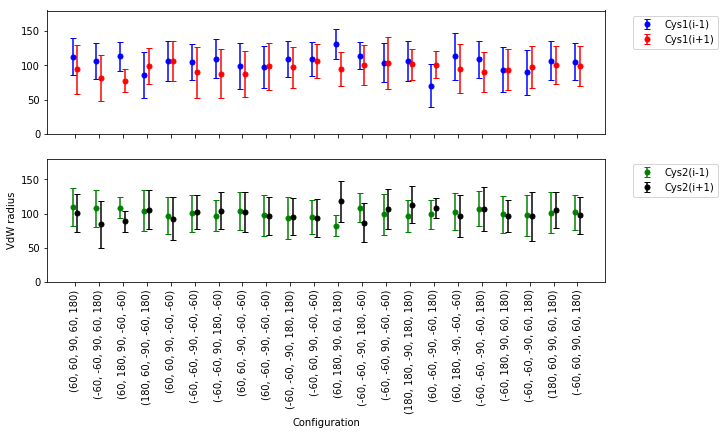

()

In [14]:
def generate_ss_bar_graph(cys1_b_vdw,cys1_a_vdw,cys2_b_vdw,cys2_a_vdw):
    fig, (ax, ax2) = plt.subplots(2, 1, sharey=True)
    i = 0
    x_axis_labels = []
    new_axis      = []
    for key in cys1_b_vdw:
        b_vdw_mean = np.mean(cys1_b_vdw[key])
        b_vdw_std  = np.std(cys1_b_vdw[key])
        a_vdw_mean = np.mean(cys1_a_vdw[key])
        a_vdw_std  = np.std(cys1_a_vdw[key])
        x_axis_labels.append(key)
        new_axis.append(key)
        x_axis_labels.append('')

        if i ==0:
            ax.errorbar(i-0.2, b_vdw_mean, yerr=b_vdw_std, fmt='o', color = 'blue', capsize=3, ms =5, label = "Cys1(i-1)")
            ax.errorbar(i+0.2, a_vdw_mean, yerr=a_vdw_std, fmt='o', color = 'red',capsize=3, ms =5, label = "Cys1(i+1)")
        if i !=0:
            ax.errorbar(i-0.2, b_vdw_mean, yerr=b_vdw_std, fmt='o', color = 'blue', capsize=3, ms =5)
            ax.errorbar(i+0.2, a_vdw_mean, yerr=a_vdw_std, fmt='o', color = 'red',capsize=3, ms =5, )
        i = i+2
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    xticks_pos = (np.arange(0, len(x_axis_labels), step=2))
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels([],rotation=90)

    
    
    i = 0
    x_axis_labels = []
    new_axis      = []
    for key in cys2_b_vdw:
        b_vdw_mean = np.mean(cys2_b_vdw[key])
        b_vdw_std  = np.std(cys2_b_vdw[key])
        a_vdw_mean = np.mean(cys2_a_vdw[key])
        a_vdw_std  = np.std(cys2_a_vdw[key])
        x_axis_labels.append(key)
        new_axis.append(key)
        x_axis_labels.append('')

        if i ==0:
            ax2.errorbar(i-0.2, b_vdw_mean, yerr=b_vdw_std, fmt='o', color = 'green', capsize=3, ms =5, label = "Cys2(i-1)")
            ax2.errorbar(i+0.2, a_vdw_mean, yerr=a_vdw_std, fmt='o', color = 'black',capsize=3, ms =5, label = "Cys2(i+1)")
        if i !=0:
            ax2.errorbar(i-0.2, b_vdw_mean, yerr=b_vdw_std, fmt='o', color = 'green', capsize=3, ms =5)
            ax2.errorbar(i+0.2, a_vdw_mean, yerr=a_vdw_std, fmt='o', color = 'black',capsize=3, ms =5, )
        i = i+2
    ax2.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.ylim(0,180)
    xticks_pos = (np.arange(0, len(x_axis_labels), step=2))
    ax2.set_xticks(xticks_pos)
    ax2.set_xticklabels(new_axis,rotation=90)
    plt.ylabel("VdW radius")
    plt.xlabel("Configuration")

    plt.show()
    return()


config_list = [] 
cys1_b_vdw = {}
cys1_a_vdw = {}
cys2_b_vdw = {}
cys2_a_vdw = {}


for config in configurations:
    config_dataframe = configuration_dataframe_return(config)
    if len(config_dataframe) > 100: 
            config_list.append(str(config))
            cys1_b_vdw[config] = config_dataframe['Cys1 b res vdw'].tolist()
            cys1_a_vdw[config] = config_dataframe['Cys1 a res vdw'].tolist()
            cys2_b_vdw[config] = config_dataframe['Cys2 b res vdw'].tolist()
            cys2_a_vdw[config] = config_dataframe['Cys2 a res vdw'].tolist()
           
            
generate_ss_bar_graph(cys1_b_vdw,cys1_a_vdw,cys2_b_vdw,cys2_a_vdw)

## Secondary Structure

/Users/david/coding/lib/python2.7/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/david/coding/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


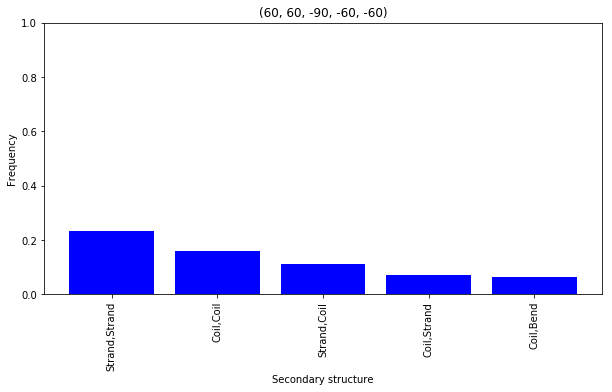

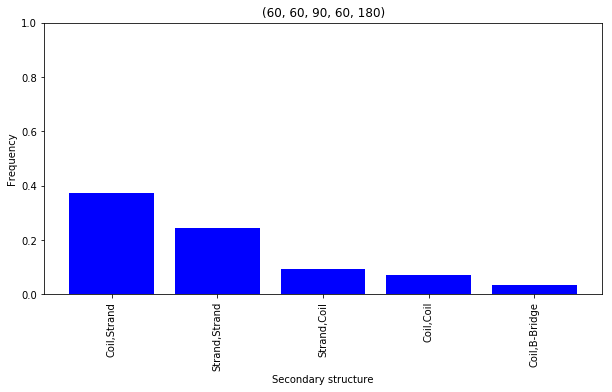

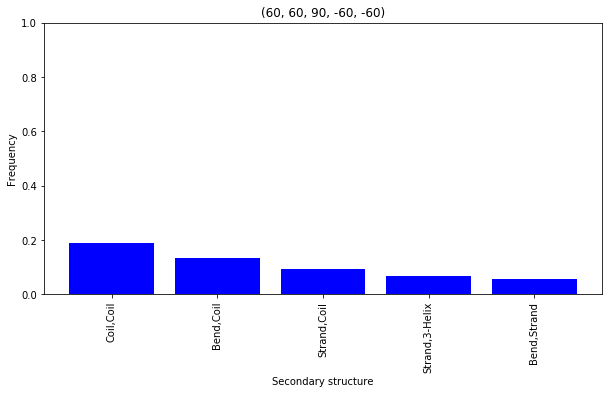

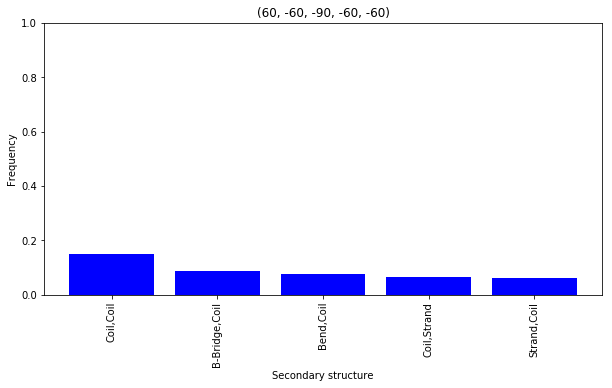

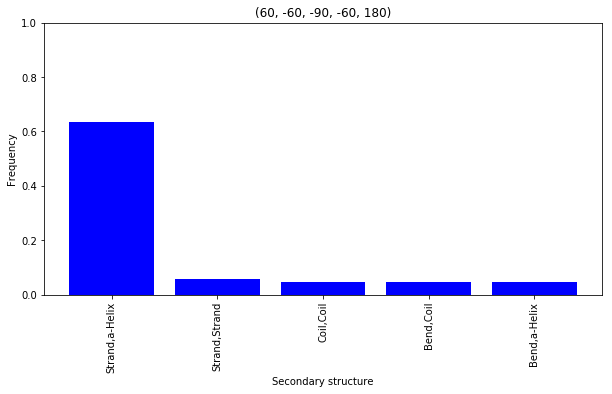

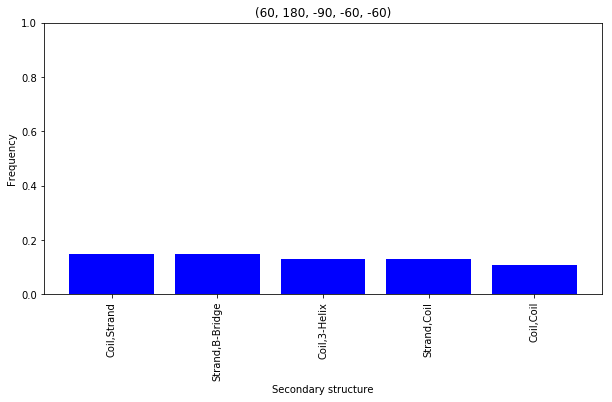

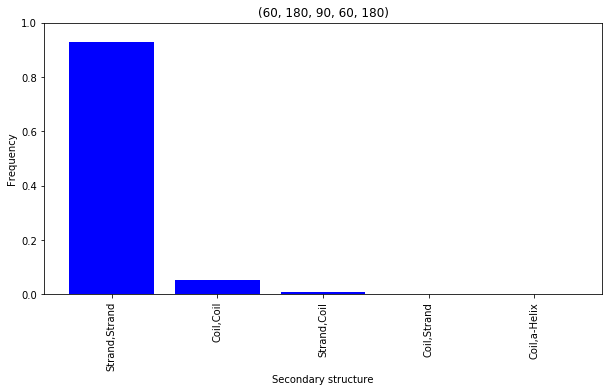

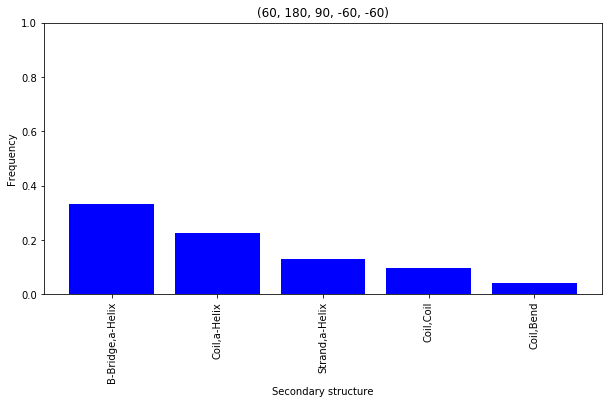

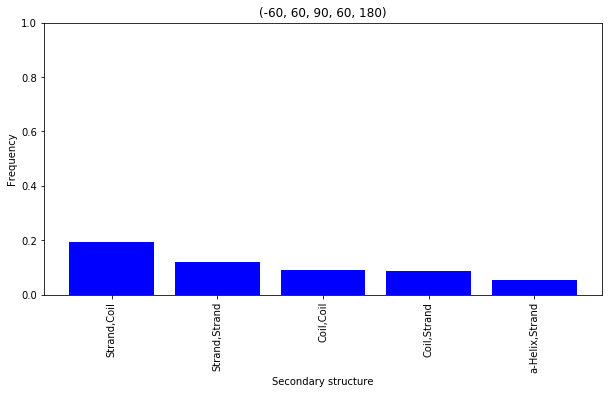

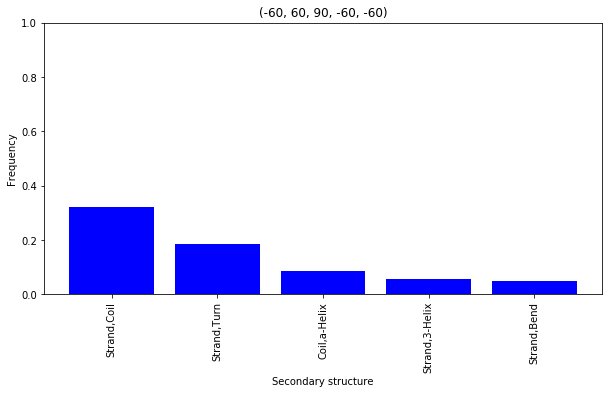

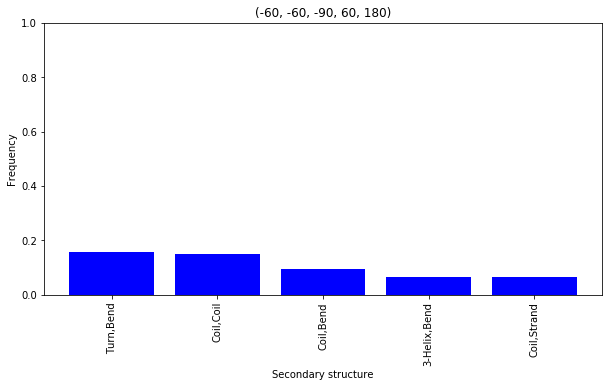

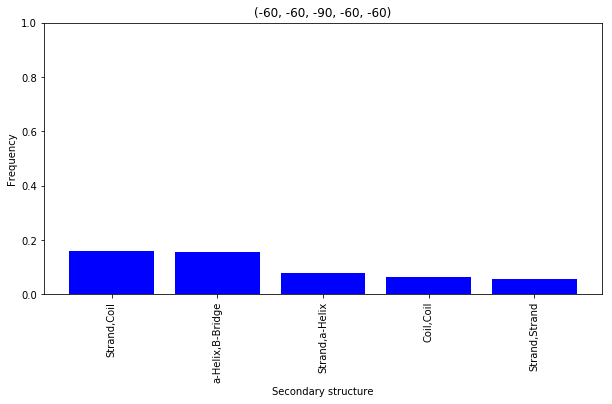

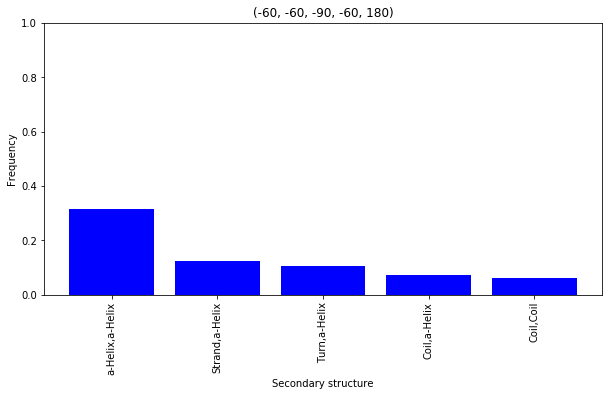

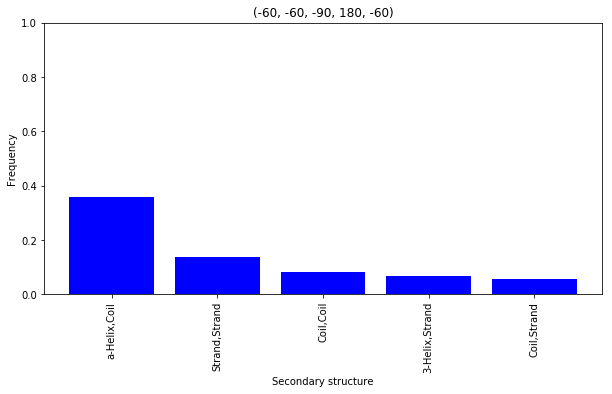

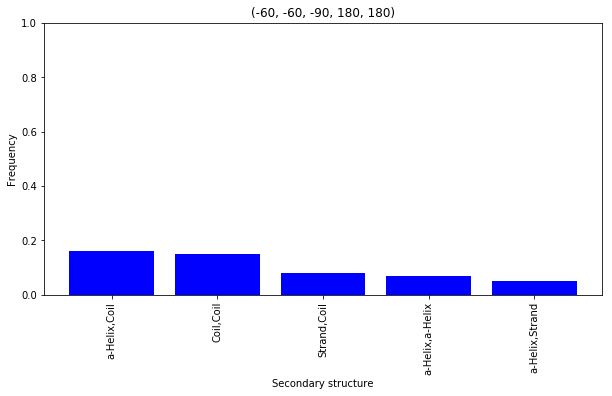

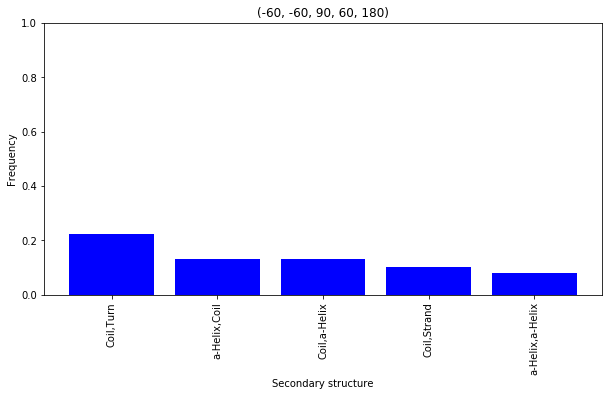

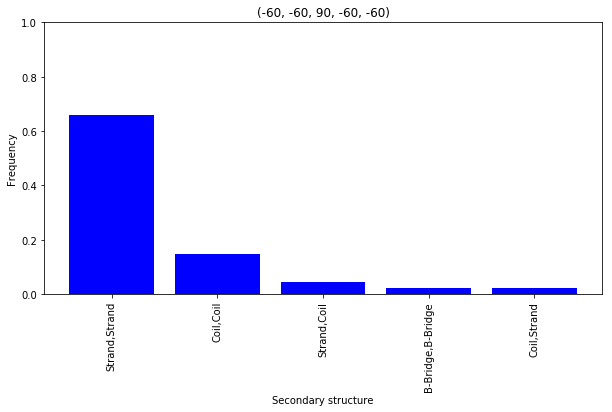

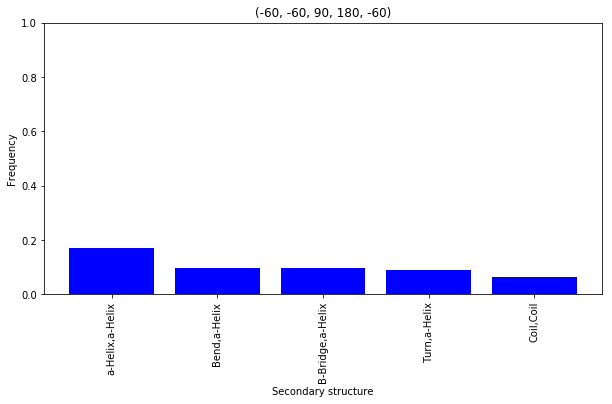

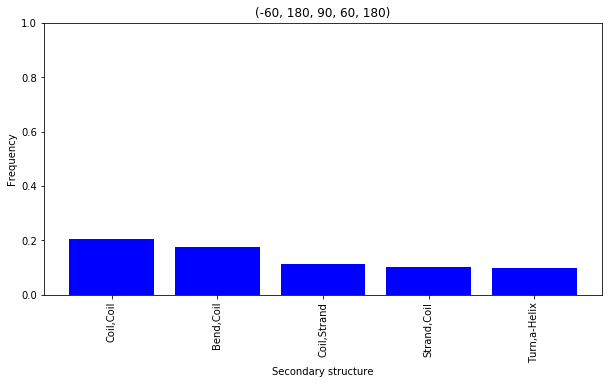

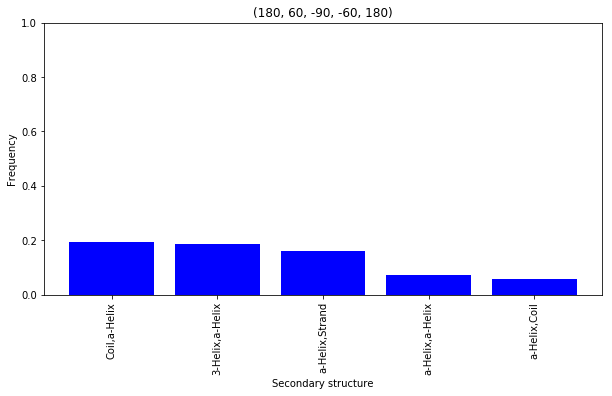

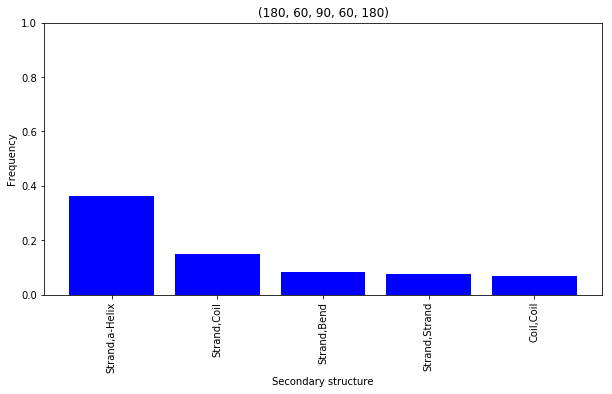

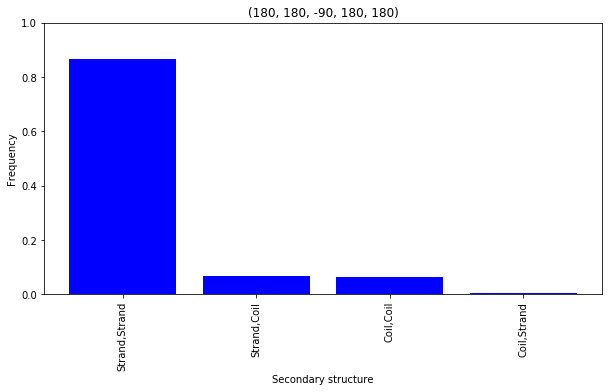

In [15]:
######################################
#--------------------------------------
# Secondary structure based on DSSP
# Can be categorised into 1 of 8 groups below
#--------------------------------------
#######################################
secondary_structure = [
'a-Helix',
'B-Bridge',
'Strand',
'3-Helix',
'5-Helix',
'Turn',
'Bend',
'Coil']

######################################
#--------------------------------------
# Create a list of all possible secondary structure linkings
# If a configuration is NOT symmetrical, than Turn-Bend is not the same as Bend-Turn
#--------------------------------------
#######################################
unique_ss = []
ss_possible = itertools.combinations(secondary_structure,2)
for ss in ss_possible:
    unique_ss.append(ss[0]+','+ss[1])
unique_ss.append("a-Helix,a-Helix")
unique_ss.append("B-Bridge,B-Bridge")
unique_ss.append("Strand,Strand")
unique_ss.append("3-Helix,3-Helix")
unique_ss.append("5-Helix,5-Helix")
unique_ss.append("Turn,Turn")
unique_ss.append("Bend,Bend")
unique_ss.append("Coil,Coil")

def generate_ss_bar_graph(frequency_dict,config_total,config):
    fig,ax = plt.subplots()
    i = 0
    x_axis_labels = []
    for key in frequency_dict:
        total = key[1]
        total = float(total)/float(config_total)
        x_axis_labels.append(key[0])
        plt.bar(i, total,color = 'blue')
        i = i+1

    plt.ylim(0,1.0)
    xticks_pos = [i for i in range(0,len(x_axis_labels))]
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels(x_axis_labels,rotation=90)
    plt.title(config)
    plt.ylabel("Frequency")
    plt.xlabel('Secondary structure')
    #plt.show()
    #plt.close()


######################################
#--------------------------------------
# Only plot the 5 most frequent SS crosslinkings for clarity
#--------------------------------------
#######################################    
for config in configurations:
    config_dataframe = configuration_dataframe_return(config)
    ss_list = config_dataframe[['Cys1_SS_cat','Cys2_SS_cat']]
    ss_list['combined'] = ss_list[['Cys1_SS_cat','Cys2_SS_cat']].apply(lambda x: ','.join(x), axis=1)
    if len(ss_list) > 100:
            common_ss = Counter(ss_list['combined'].tolist())
            common_ss = common_ss.most_common(5)
            generate_ss_bar_graph(common_ss, len(config_dataframe),config)

## Secondary Structure by Configuration

In [26]:
def generate_ss_configuration_freq(total_dict,config_total,ss):
    ss_title = str(ss).replace(')','')
    ss_title = ss_title.replace('(','')

    fig, ax = plt.subplots()
    i= 0
    config_ticks = []
    for key in total_dict:
        config = str(key).replace(')','')
        config = config.replace('(','')
        config_ticks.append(config)
        plt.bar(i, float(total_dict[key])/float(config_total),color = 'blue')
        i =i+1
    plt.ylim(0,1.23)
    xticks_pos = [i for i in range(0,len(config_ticks))]
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels(config_ticks,rotation=90)
    plt.title(ss_title)
    plt.ylabel("Frequency")
    plt.xlabel('Configuration')
    plt.show()
    return()


df['combined'] = df[['Cys1_SS_cat','Cys2_SS_cat']].apply(lambda x: ','.join(x), axis=1)

for ss in unique_ss:
    ss = ss.split(',')
    ss_forward = ss[0] + ',' +ss[1]
    ss_reverse = ss[1]+ ',' +ss[0]

    if ss_forward == ss_reverse:
        ss_df = df.loc[df['combined'] == ss_forward]        
    if ss_forward != ss_reverse:
        ss_df = df.loc[(df['combined'] == ss_forward) | (df['combined'] == ss_reverse)]
    
    #total = df['combined'].tolist().count(ss_forward) +df['combined'].tolist().count(ss_reverse)
    total = len(ss_df)
    if total > 100:
        total_dict = {}
        #forward_config = 0
        #reverse_config = 0
        complete_total = 0
        
        for config in configurations:
                common_list=[]
                config_total = 0
                forward_config = 0
                reverse_config = 0
                forward_config = len(ss_df.loc[
                        (ss_df['Cys1_x1'] == float(config[0])) & 
                        (ss_df['Cys1_x2'] == float(config[1])) & 
                        (ss_df['x3'     ] == float(config[2])) & 
                        (ss_df['Cys2_x2'] == float(config[3])) & 
                        (ss_df['Cys2_x1'] == float(config[4])) 
                       ])
    
    ###################################################################################
    # If the configuration IS NOT symmetrical, then search for the reverse configuration
    # x1b,x2b,x3,x2,x1
    ###################################################################################
                if config != config[::-1]:
                    reverse_config = len(ss_df.loc[
                             (ss_df['Cys2_x1'] == float(config[0])) & 
                             (ss_df['Cys2_x2'] == float(config[1])) & 
                             (ss_df['x3'     ] == float(config[2])) & 
                             (ss_df['Cys1_x2'] == float(config[3])) & 
                             (ss_df['Cys1_x1'] == float(config[4])) 
                            ])
                config_total = forward_config + reverse_config
                if config_total > 1:
                    total_dict[config_total] = config
                    common_list.append(config_total)
                
                complete_total = complete_total + config_total
        
        common_ss = common_list.most_common(5)
        print common_ss
        #print total_dict   
        #value,count = Counter(total_dict.values()).most_common(5)[0]
        #keys = Counter(total_dict.values())
        #mode = keys.most_common(1)
#         print mode
       # generate_ss_configuration_freq(total_dict,total,ss)
    


AttributeError: 'list' object has no attribute 'most_common'

In [ ]:
def generate_ss_configuration_freq(total_dict,config_total,ss):
    ss_title = str(ss).replace(')','')
    ss_title = ss_title.replace('(','')

    fig, ax = plt.subplots()
    i= 0
    config_ticks = []
    for key in total_dict:
        config = str(key).replace(')','')
        config = config.replace('(','')
        config_ticks.append(config)
        plt.bar(i, float(total_dict[key])/float(config_total),color = 'blue')
        i =i+1
    plt.ylim(0,1.23)
    xticks_pos = [i for i in range(0,len(config_ticks))]
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels(config_ticks,rotation=90)
    plt.title(ss_title)
    plt.ylabel("Frequency")
    plt.xlabel('Configuration')
    plt.show()
    return()


df['combined'] = df[['Cys1_SS_cat','Cys2_SS_cat']].apply(lambda x: ','.join(x), axis=1)

for ss in unique_ss:
    ss = ss.split(',')
    ss_forward = ss[0] + ',' +ss[1]
    ss_reverse = ss[1]+ ',' +ss[0]

    if ss_forward == ss_reverse:
        ss_df = df.loc[df['combined'] == ss_forward]        
    if ss_forward != ss_reverse:
        ss_df = df.loc[(df['combined'] == ss_forward) | (df['combined'] == ss_reverse)]
    
    #total = df['combined'].tolist().count(ss_forward) +df['combined'].tolist().count(ss_reverse)
    total = len(ss_df)
    if total > 100:
        total_dict = {}
        #forward_config = 0
        #reverse_config = 0
        complete_total = 0
        
        for config in configurations:
                config_total = 0
                forward_config = 0
                reverse_config = 0
                forward_config = len(ss_df.loc[
                        (ss_df['Cys1_x1'] == float(config[0])) & 
                        (ss_df['Cys1_x2'] == float(config[1])) & 
                        (ss_df['x3'     ] == float(config[2])) & 
                        (ss_df['Cys2_x2'] == float(config[3])) & 
                        (ss_df['Cys2_x1'] == float(config[4])) 
                       ])
    
    ###################################################################################
    # If the configuration IS NOT symmetrical, then search for the reverse configuration
    # x1b,x2b,x3,x2,x1
    ###################################################################################
                if config != config[::-1]:
                    reverse_config = len(ss_df.loc[
                             (ss_df['Cys2_x1'] == float(config[0])) & 
                             (ss_df['Cys2_x2'] == float(config[1])) & 
                             (ss_df['x3'     ] == float(config[2])) & 
                             (ss_df['Cys1_x2'] == float(config[3])) & 
                             (ss_df['Cys1_x1'] == float(config[4])) 
                            ])
                config_total = forward_config + reverse_config
                if config_total > 1:
                    total_dict[config] = config_total
                
                complete_total = complete_total + config_total
        print total_dict   
        #value,count = Counter(total_dict.values()).most_common(5)[0]
        keys = Counter(total_dict.values())
        mode = keys.most_common(1)
#         print mode
       # generate_ss_configuration_freq(total_dict,total,ss)